In [1]:
import pandas as pd
import data_cleaning_functions as mylib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import folium

dataset_path = 'data/merged_records.csv'
raw_data = pd.read_csv(dataset_path)

raw_data.head()

Incident Type  Year  Reported Month               Region of Origin  \
0      Incident  2014               1                Central America   
1      Incident  2014               1  Latin America / Caribbean (P)   
2      Incident  2014               1  Latin America / Caribbean (P)   
3      Incident  2014               1                Central America   
4      Incident  2014               1                Northern Africa   

  Region of Incident Country of Origin  Number Dead  \
0      North America         Guatemala          1.0   
1      North America           Unknown          1.0   
2      North America           Unknown          1.0   
3      North America            Mexico          1.0   
4             Europe             Sudan          1.0   

   Minimum Estimated Number of Missing  Total Dead and Missing  \
0                                  0.0                       1   
1                                  0.0                       1   
2                                  0.0                       1   
3                                  0.0                       1   
4                                  0.0                       1   

   Number of Survivors  ...  Rounded_Lon  dataset  Unnamed: 0 Main ID  \
0                  0.0  ...     -110.366        3         NaN     NaN   
1                  0.0  ...     -111.738        3         NaN     NaN   
2                  0.0  ...     -113.011        3         NaN     NaN   
3                  0.0  ...     -109.316        3         NaN     NaN   
4                  2.0  ...       28.000        3         NaN     NaN   

  Incident ID Incident Date  URL Source Quality Web ID  Reported Date  
0         NaN           NaN  NaN            NaN    NaN            NaN  
1         NaN           NaN  NaN            NaN    NaN            NaN  
2         NaN           NaN  NaN            NaN    NaN            NaN  
3         NaN           NaN  NaN            NaN    NaN            NaN  
4         NaN           NaN  NaN            NaN    NaN            NaN  

[5 rows x 32 columns]

In [2]:
help(mylib)

Help on module data_cleaning_functions:

NAME
    data_cleaning_functions - # coding: utf-8

FUNCTIONS
    check_null_values(data)
    
    clean_column_names(raw_data)
        # To ensure consistency and ease of use, standardize the column names of the dataframe.
    
    clean_data(raw_data)
    
    data_analysis_report(raw_data)
    
    detect_outliers_zscore(data, threshold=3)
        # Define a function to detect outliers using the z-score method
    
    drop_duplicates(data, columns, keep)
    
    drop_raws_with_na_values(data, columns)
    
    fill_all_null_values(data)
    
    fill_null_with_mean_or_median(data, column, method='mean')
    
    fill_null_with_previous_or_next_value(data, column, method='previous')
    
    fill_nulls_in_dataset_with_previous_or_next(data, method='previous')
    
    fix_numeric_column_types(data)
    
    get_duplicate_rows(data, columns=None)
    
    get_rows_with_null_values(data, columns=[])
    
    identify_and_convert_all_numeric_co

In [3]:
mylib.data_analysis_report(raw_data)

INFO:root:Removing rows with missing values (NaN)...
INFO:root:Rows with missing values (NaN) removed.


columns  \
Non-Snake Case Columns  [Incident Type, Year, Reported Month, Region o...   
Missing Values          [Incident Type, Region of Origin, Country of O...   
Outliers Detected       [Number Dead, Minimum Estimated Number of Miss...   
Incorrect Data Types    {'Year': <class 'int'>, 'Reported Month': <cla...   

                                                                    count  \
Non-Snake Case Columns                                                 31   
Missing Values          {'Incident Type': 3012, 'Year': 0, 'Reported M...   
Outliers Detected                                                       9   
Incorrect Data Types                                                   17   

                                                             issue  \
Non-Snake Case Columns  Column labels are not in snake_case format   
Missing Values                 Missing values found in the dataset   
Outliers Detected                 Outliers detected in the dataset   
Incorrect Data Types          Inconsistent or incorrect data types   

                                                           recommendation  
Non-Snake Case Columns  Rename columns to snake_case format: Incident ...  
Missing Values                            Remove or impute missing values  
Outliers Detected       Handle outliers appropriately (e.g., remove or...  
Incorrect Data Types     Ensure data types are appropriate and consistent

In [4]:
raw_data

Incident Type  Year  Reported Month               Region of Origin  \
0          Incident  2014               1                Central America   
1          Incident  2014               1  Latin America / Caribbean (P)   
2          Incident  2014               1  Latin America / Caribbean (P)   
3          Incident  2014               1                Central America   
4          Incident  2014               1                Northern Africa   
...             ...   ...             ...                            ...   
14189           NaN  2014               1                            NaN   
14190           NaN  2014               1                            NaN   
14191           NaN  2014               1                            NaN   
14192           NaN  2014               1                            NaN   
14193           NaN  2014               1                            NaN   

      Region of Incident Country of Origin  Number Dead  \
0          North America         Guatemala          1.0   
1          North America           Unknown          1.0   
2          North America           Unknown          1.0   
3          North America            Mexico          1.0   
4                 Europe             Sudan          1.0   
...                  ...               ...          ...   
14189             Europe               NaN          1.0   
14190      Mediterranean               NaN         12.0   
14191   US-Mexico Border               NaN          1.0   
14192   US-Mexico Border               NaN          1.0   
14193             Europe               NaN          1.0   

       Minimum Estimated Number of Missing  Total Dead and Missing  \
0                                      0.0                       1   
1                                      0.0                       1   
2                                      0.0                       1   
3                                      0.0                       1   
4                                      0.0                       1   
...                                    ...                     ...   
14189                                  0.0                       1   
14190                                  NaN                      12   
14191                                  NaN                       1   
14192                                  NaN                       1   
14193                                  0.0                       1   

       Number of Survivors  ...  Rounded_Lon  dataset  Unnamed: 0 Main ID  \
0                      0.0  ...     -110.366        3         NaN     NaN   
1                      0.0  ...     -111.738        3         NaN     NaN   
2                      0.0  ...     -113.011        3         NaN     NaN   
3                      0.0  ...     -109.316        3         NaN     NaN   
4                      2.0  ...       28.000        3         NaN     NaN   
...                    ...  ...          ...      ...         ...     ...   
14189                  2.0  ...        1.879        1         NaN     NaN   
14190                  NaN  ...       27.158        1         NaN     NaN   
14191                  NaN  ...     -111.624        1         NaN     NaN   
14192                  NaN  ...     -109.545        1         NaN     NaN   
14193                  2.0  ...       27.859        1         NaN     NaN   

      Incident ID Incident Date                    URL Source Quality  \
0             NaN           NaN                    NaN            NaN   
1             NaN           NaN                    NaN            NaN   
2             NaN           NaN                    NaN            NaN   
3             NaN           NaN                    NaN            NaN   
4             NaN           NaN                    NaN            NaN   
...           ...           ...                    ...            ...   
14189         NaN           NaN  http://bit.ly/1icTIF9            4.0   
14190         NaN           NaN  h

## Step 1: Removing Duplicates

In [5]:
duplicate_rows = raw_data.duplicated().sum()

if duplicate_rows > 0:
    raw_data.drop_duplicates(inplace=True)

duplicate_rows

0

## Step 2: Snake case

In [6]:
raw_data = mylib.clean_column_names(raw_data)
raw_data

INFO:root:Cleaning column names...
INFO:root:Column names cleaned.


incident_type  year  reported_month               region_of_origin  \
0          Incident  2014               1                Central America   
1          Incident  2014               1  Latin America / Caribbean (P)   
2          Incident  2014               1  Latin America / Caribbean (P)   
3          Incident  2014               1                Central America   
4          Incident  2014               1                Northern Africa   
...             ...   ...             ...                            ...   
14189           NaN  2014               1                            NaN   
14190           NaN  2014               1                            NaN   
14191           NaN  2014               1                            NaN   
14192           NaN  2014               1                            NaN   
14193           NaN  2014               1                            NaN   

      region_of_incident country_of_origin  number_dead  \
0          North America         Guatemala          1.0   
1          North America           Unknown          1.0   
2          North America           Unknown          1.0   
3          North America            Mexico          1.0   
4                 Europe             Sudan          1.0   
...                  ...               ...          ...   
14189             Europe               NaN          1.0   
14190      Mediterranean               NaN         12.0   
14191   US-Mexico Border               NaN          1.0   
14192   US-Mexico Border               NaN          1.0   
14193             Europe               NaN          1.0   

       minimum_estimated_number_of_missing  total_dead_and_missing  \
0                                      0.0                       1   
1                                      0.0                       1   
2                                      0.0                       1   
3                                      0.0                       1   
4                                      0.0                       1   
...                                    ...                     ...   
14189                                  0.0                       1   
14190                                  NaN                      12   
14191                                  NaN                       1   
14192                                  NaN                       1   
14193                                  0.0                       1   

       number_of_survivors  ...  rounded_lon  dataset  unnamed_0 main_id  \
0                      0.0  ...     -110.366        3        NaN     NaN   
1                      0.0  ...     -111.738        3        NaN     NaN   
2                      0.0  ...     -113.011        3        NaN     NaN   
3                      0.0  ...     -109.316        3        NaN     NaN   
4                      2.0  ...       28.000        3        NaN     NaN   
...                    ...  ...          ...      ...        ...     ...   
14189                  2.0  ...        1.879        1        NaN     NaN   
14190                  NaN  ...       27.158        1        NaN     NaN   
14191                  NaN  ...     -111.624        1        NaN     NaN   
14192                  NaN  ...     -109.545        1        NaN     NaN   
14193                  2.0  ...       27.859        1        NaN     NaN   

      incident_id incident_date                    url source_quality  \
0             NaN           NaN                    NaN            NaN   
1             NaN           NaN                    NaN            NaN   
2             NaN           NaN                    NaN            NaN   
3             NaN           NaN                    NaN            NaN   
4             NaN           NaN                    NaN            NaN   
...           ...           ...                    ...            ...   
14189         NaN           NaN  http://bit.ly/1icTIF9            4.0   
14190         NaN           NaN  http://bit.ly

In [7]:
def print_unique_value_counts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        unique_values = df[column].unique()
        unique_count = len(unique_values)
        print(f"Column: {column}\nUnique Values: {unique_count}\nValue Counts:")
        print(df[column].value_counts())
        print("-" * 50)

print_unique_value_counts(raw_data)

Column: incident_type
Unique Values: 5
Value Counts:
incident_type
Incident                   10839
Split Incident               256
Cumulative Incident           82
Incident,Split Incident        5
Name: count, dtype: int64
--------------------------------------------------
Column: region_of_origin
Unique Values: 34
Value Counts:
region_of_origin
Latin America / Caribbean (P)    2044
Unknown                          1551
Central America                  1503
Sub-Saharan Africa (P)           1246
Southern Asia                    1106
Eastern Africa (P)                970
Northern Africa                   436
Western Asia                      396
South America                     306
Caribbean                         269
Eastern Africa                    263
Western Africa                    216
Western / Southern Asia (P)       211
Sub-Saharan Africa                112
Northern Africa (P)               112
Mixed                             101
South-eastern Asia                 67
Sout

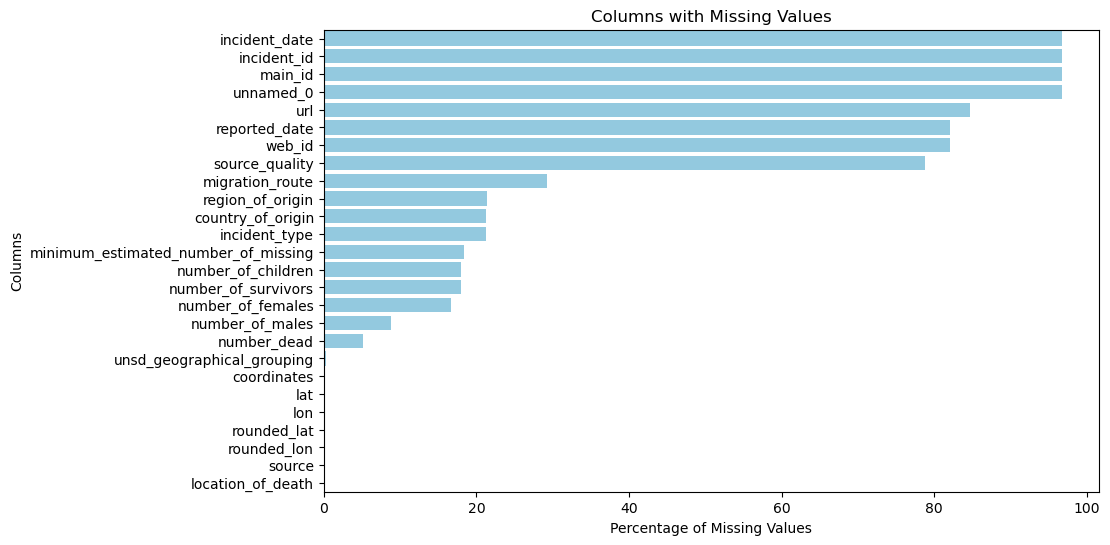

In [8]:
# This function calculates the percentage of missing values for each column, 
# filters out columns with no missing values, and then creates a horizontal 
# bar plot to visualize the columns with the most missing values.
def plot_missing_values(dataframe):
    # Calculate percentage of missing values for each column
    missing_percentages = (dataframe.isnull().sum() / len(dataframe)) * 100
    
    # Filter columns with missing values
    missing_columns = missing_percentages[missing_percentages > 0]
    
    # Sort columns by percentage of missing values in descending order
    missing_columns = missing_columns.sort_values(ascending=False)
    
    # Plot the missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_columns, y=missing_columns.index, color='skyblue')
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Columns')
    plt.title('Columns with Missing Values')
    plt.show()

plot_missing_values(raw_data)


## Function for Plotting Columns with Missing Values

**What We Did:**
Created a function `plot_missing_values` that takes a DataFrame as an argument.
The function calculates the percentage of missing values for each column, filters out columns with no missing values, and sorts them in descending order.
It then plots these columns with their respective percentages of missing values.

**Why:**
To quickly visualize which columns in the DataFrame have the most missing values. This can aid in prioritizing data cleaning efforts and understanding the dataset's quality.



In [9]:
columns_to_remove = [
    'unnamed_0',
    'main_id',
    'incident_id',
    'incident_date',
    'url',
    'source_quality',
    'web_id',
    'reported_date',
    'rounded_lat',
    'rounded_lon',
    'incident_type'
]

raw_data = raw_data.drop(columns_to_remove, axis = 1)
raw_data

year  reported_month               region_of_origin region_of_incident  \
0      2014               1                Central America      North America   
1      2014               1  Latin America / Caribbean (P)      North America   
2      2014               1  Latin America / Caribbean (P)      North America   
3      2014               1                Central America      North America   
4      2014               1                Northern Africa             Europe   
...     ...             ...                            ...                ...   
14189  2014               1                            NaN             Europe   
14190  2014               1                            NaN      Mediterranean   
14191  2014               1                            NaN   US-Mexico Border   
14192  2014               1                            NaN   US-Mexico Border   
14193  2014               1                            NaN             Europe   

      country_of_origin  number_dead  minimum_estimated_number_of_missing  \
0             Guatemala          1.0                                  0.0   
1               Unknown          1.0                                  0.0   
2               Unknown          1.0                                  0.0   
3                Mexico          1.0                                  0.0   
4                 Sudan          1.0                                  0.0   
...                 ...          ...                                  ...   
14189               NaN          1.0                                  0.0   
14190               NaN         12.0                                  NaN   
14191               NaN          1.0                                  NaN   
14192               NaN          1.0                                  NaN   
14193               NaN          1.0                                  0.0   

       total_dead_and_missing  number_of_survivors  number_of_females  ...  \
0                           1                  0.0                0.0  ...   
1                           1                  0.0                0.0  ...   
2                           1                  0.0                0.0  ...   
3                           1                  0.0                0.0  ...   
4                           1                  2.0                0.0  ...   
...                       ...                  ...                ...  ...   
14189                       1                  2.0                NaN  ...   
14190                      12                  NaN                9.0  ...   
14191                       1                  NaN                NaN  ...   
14192                       1                  NaN                NaN  ...   
14193                       1                  2.0                NaN  ...   

       number_of_children                                     cause_of_death  \
0                     0.0                                   Mixed or unknown   
1                     0.0                                   Mixed or unknown   
2                     0.0                                   Mixed or unknown   
3                     0.0                                           Violence   
4                     0.0  Harsh environmental conditions / lack of adequ...   
...                   ...                                                ...   
14189                 1.0                                   Vehicle Accident   
14190                 3.0                                           Drowning   
14191                 NaN                                               Shot   
14192                 NaN                                               Shot   
14193                 NaN                                       Hyperthermia   

                 migration_route  \
0      US-Mexico border crossing   
1      US-Mexico border crossing   
2      US-Mexico border crossing   
3      US-Mexico border crossing   
4                            Na

In [10]:
raw_data.dtypes

year                                     int64
reported_month                           int64
region_of_origin                        object
region_of_incident                      object
country_of_origin                       object
number_dead                            float64
minimum_estimated_number_of_missing    float64
total_dead_and_missing                   int64
number_of_survivors                    float64
number_of_females                      float64
number_of_males                        float64
number_of_children                     float64
cause_of_death                          object
migration_route                         object
location_of_death                       object
source                                  object
coordinates                             object
unsd_geographical_grouping              object
lat                                    float64
lon                                    float64
dataset                                  int64
dtype: object

In [11]:
raw_data.isna().sum().T

year                                      0
reported_month                            0
region_of_origin                       3033
region_of_incident                        0
country_of_origin                      3020
number_dead                             723
minimum_estimated_number_of_missing    2607
total_dead_and_missing                    0
number_of_survivors                    2552
number_of_females                      2361
number_of_males                        1251
number_of_children                     2559
cause_of_death                            0
migration_route                        4149
location_of_death                         8
source                                   12
coordinates                              14
unsd_geographical_grouping               47
lat                                      14
lon                                      14
dataset                                   0
dtype: int64

In [12]:
categorical = raw_data.select_dtypes(include='object')
categorical

region_of_origin region_of_incident country_of_origin  \
0                    Central America      North America         Guatemala   
1      Latin America / Caribbean (P)      North America           Unknown   
2      Latin America / Caribbean (P)      North America           Unknown   
3                    Central America      North America            Mexico   
4                    Northern Africa             Europe             Sudan   
...                              ...                ...               ...   
14189                            NaN             Europe               NaN   
14190                            NaN      Mediterranean               NaN   
14191                            NaN   US-Mexico Border               NaN   
14192                            NaN   US-Mexico Border               NaN   
14193                            NaN             Europe               NaN   

                                          cause_of_death  \
0                                       Mixed or unknown   
1                                       Mixed or unknown   
2                                       Mixed or unknown   
3                                               Violence   
4      Harsh environmental conditions / lack of adequ...   
...                                                  ...   
14189                                   Vehicle Accident   
14190                                           Drowning   
14191                                               Shot   
14192                                               Shot   
14193                                       Hyperthermia   

                 migration_route  \
0      US-Mexico border crossing   
1      US-Mexico border crossing   
2      US-Mexico border crossing   
3      US-Mexico border crossing   
4                            NaN   
...                          ...   
14189   Calais to United Kingdom   
14190      Eastern Mediterranean   
14191      Central America to US   
14192      Central America to US   
14193                        NaN   

                                       location_of_death  \
0      Pima Country Office of the Medical Examiner ju...   
1      Pima Country Office of the Medical Examiner ju...   
2      Pima Country Office of the Medical Examiner ju...   
3                             near Douglas, Arizona, USA   
4                      Border between Russia and Estonia   
...                                                  ...   
14189                                    France - Calais   
14190  Waters near Greece while being towed back to T...   
14191                                        Pima County   
14192                              near Douglas, Arizona   
14193                  Border between Russia and Estonia   

                                                  source  \
0      Pima County Office of the Medical Examiner (PC...   
1      Pima County Office of the Medical Examiner (PC...   
2      Pima County Office of the Medical Examiner (PC...   
3      Ministry of Foreign Affairs Mexico, Pima Count...   
4                      EUBusiness (Agence France-Presse)   
...                                                  ...   
14189                         Calais Migrant Solidarity    
14190            European Council on Refugees and Exiles   
14191         Pima County Office of the Medical Examiner   
14192                 Ministry of Foreign Affairs Mexico   
14193                  EUBusiness (Agence France-Presse)   

                              coordinates unsd_geographical_grouping  
0                  31.650259, -110.366453           Northern America  
1                    31.59713, -111.73756           Northern America  
2                    31.94026, -113.01125           Northern America  
3                  31.506777, -109.315632           Northern America  
4                             59.1551, 28            Northern Europe  
...                                   ...                        ...  
14

## Data Transformation - Comparing Categorical Columns

### What:
- Display the unique values for the 'Region of Origin' and 'UNSD Geographical Grouping' columns.
- Compare the 'Region of Origin' and 'UNSD Geographical Grouping' columns for each row to see if the values are the same or different.

### Why:
- The purpose was to compare the categorization of regions in these two columns and assess whether they can be harmonized or if they serve different purposes.
- To assess if one of these columns is redundant and can be dropped, thereby simplifying the dataset.

In [13]:
region_of_origin_unique_values = raw_data['region_of_incident'].unique()
unsd_geographical_grouping_unique_values = raw_data['unsd_geographical_grouping'].unique()

region_of_origin_unique_values, unsd_geographical_grouping_unique_values

(array(['North America', 'Europe', 'Mediterranean', 'Caribbean',
        'Southeast Asia', 'South Asia', 'Eastern Africa',
        'Central America', 'North Africa', 'Eastern Asia', 'Western Asia',
        'Western Africa', 'South America', 'Southern Africa',
        'Middle Africa', 'Central Asia', 'Middle East', 'US-Mexico Border',
        'Sub-Saharan Africa', 'Horn of Africa'], dtype=object),
 array(['Northern America', 'Northern Europe', 'Uncategorized',
        'Western Europe', 'Caribbean', 'South-eastern Asia',
        'Southern Asia', 'Central America', 'Eastern Africa',
        'Northern Africa', 'Eastern Asia', 'Western Asia',
        'Eastern Europe', 'Southern Europe', 'Western Africa',
        'South America', 'Southern Africa', 'Middle Africa',
        'Central Asia', nan, 'South Asia', 'Central Africa'], dtype=object))

In [14]:
region_comparison = raw_data['region_of_incident'] == raw_data['unsd_geographical_grouping']

# Count the number of rows where the two regions are the same and where they are different
region_comparison_counts = region_comparison.value_counts()

# Display the comparison counts
region_comparison_counts

False    10887
True      3307
Name: count, dtype: int64

### Outcome:
- The 'Region of Origin' column contains 34 unique values, including variations with '(P)' and 'Unknown'.
- The 'UNSD Geographical Grouping' column contains 22 unique values, including 'Uncategorized'.
- The two columns are the same in 2,046 rows.
- The two columns are different in 12,148 rows.

### Observations:
- The 'Region of Origin' column provides more granularity, with specific regions identified, sometimes with variations marked by '(P)'.
- The 'UNSD Geographical Grouping' column appears to be more standardized, but it has fewer unique values, indicating potential less granularity.
- Both columns seem to serve similar yet distinct purposes. 'Region of Origin' is more specific, while 'UNSD Geographical Grouping' is more standardized.
- In the majority of cases (12,148 rows), the two columns are not the same, indicating that they likely serve different purposes or levels of granularity.
- Only in 2,046 rows are the values the same, which is a minority of the cases.

#### Given these results, it doesn't seem advisable to drop either column, as they appear to provide different information.


## Checking 1x1 Mapping Between 'Region of Incident' and 'UNSD Geographical Grouping'

### What:
Check if there is a 1x1 mapping between the 'Region of Incident' and 'UNSD Geographical Grouping' columns, excluding NaN values.

### Why:
The purpose was to determine if the two columns are directly interchangeable, which would allow us to potentially simplify the dataset by removing one of them.


In [15]:
inference_check = raw_data.groupby('region_of_incident')['unsd_geographical_grouping'].nunique()

# Display the number of unique 'unsd_geographical_grouping' for each 'region_of_incident'
inference_check

region_of_incident
Caribbean             5
Central America       5
Central Asia          1
Eastern Africa        5
Eastern Asia          1
Europe                6
Horn of Africa        4
Mediterranean         5
Middle Africa         1
Middle East           3
North Africa          5
North America         4
South America         3
South Asia            5
Southeast Asia        5
Southern Africa       3
Sub-Saharan Africa    7
US-Mexico Border      6
Western Africa        3
Western Asia          3
Name: unsd_geographical_grouping, dtype: int64

In [16]:
inference_check_reverse = raw_data.groupby('unsd_geographical_grouping')['region_of_incident'].nunique()

inference_check_reverse

unsd_geographical_grouping
Caribbean              1
Central Africa         1
Central America        5
Central Asia           2
Eastern Africa         6
Eastern Asia           3
Eastern Europe         2
Middle Africa          1
Northern Africa        8
Northern America       4
Northern Europe        2
South America          4
South Asia             2
South-eastern Asia     2
Southern Africa        2
Southern Asia          2
Southern Europe        4
Uncategorized         16
Western Africa         3
Western Asia           7
Western Europe         3
Name: region_of_incident, dtype: int64

In [17]:
pivot_table_region_unsd = pd.pivot_table(raw_data, index='region_of_incident', columns='unsd_geographical_grouping', 
                                         values='year', aggfunc='count', fill_value=0)
pivot_table_region_unsd

unsd_geographical_grouping  Caribbean  Central Africa  Central America  \
region_of_incident                                                       
Caribbean                         125               0                2   
Central America                     0               0             1327   
Central Asia                        0               0                0   
Eastern Africa                      0               0                0   
Eastern Asia                        0               0                0   
Europe                              0               0                0   
Horn of Africa                      0               0                0   
Mediterranean                       0               0                0   
Middle Africa                       0               0                0   
Middle East                         0               0                0   
North Africa                        0               0                0   
North America                       0               0                2   
South America                       0               0                2   
South Asia                          0               0                0   
Southeast Asia                      0               0                0   
Southern Africa                     0               0                0   
Sub-Saharan Africa                  0              13                0   
US-Mexico Border                    0               0              249   
Western Africa                      0               0                0   
Western Asia                        0               0                0   

unsd_geographical_grouping  Central Asia  Eastern Africa  Eastern Asia  \
region_of_incident                                                       
Caribbean                              0               0             0   
Central America                        1               0             0   
Central Asia                           1               0             0   
Eastern Africa                         0             418             3   
Eastern Asia                           0               0            12   
Europe                                 0               0             0   
Horn of Africa                         0             169             0   
Mediterranean                          0               0             0   
Middle Africa                          0               0             0   
Middle East                            0               0             0   
North Africa                           0               8             0   
North America                          0               0             0   
South America                          0               0             0   
South Asia                             0               0             0   
Southeast Asia                         0               0             2   
Southern Africa                        0               3             0   
Sub-Saharan Africa                     0              97             0   
US-Mexico Border                       0               0             0   
Western Africa                         0               0             0   
Western Asia                           0               2             0   

unsd_geographical_grouping  Eastern Europe  Middle Africa  Northern Africa  \
region_of_incident                                                           
Caribbean                                0              0                0   
Central America                          0              0                0   
Central Asia                             0              0                0   
Eastern Africa                           0              0                1   
Eastern Asia                             0              0                0   
Europe                                 111              0                0   
Horn of Africa                           0              0               17   
Mediterranean                           


### Outcome:
Both columns do not have unique values when paired, indicating that there is not a 1x1 mapping between the two.

### Observations:
Since neither column has unique values, it suggests that multiple 'Region of Incident' values can correspond to a single 'UNSD Geographical Grouping' value, and vice versa.

Therefore, the two columns are not directly interchangeable and serve different categorization purposes.

Since there is no 1x1 mapping, it would not be advisable to remove either column based on this criterion.


In [18]:
raw_data[raw_data['unsd_geographical_grouping'].isna()]['region_of_incident'].value_counts()

region_of_incident
Southeast Asia        30
South Asia             6
US-Mexico Border       5
Caribbean              2
North America          1
Sub-Saharan Africa     1
South America          1
Mediterranean          1
Name: count, dtype: int64

## Observations

The missing 'UNSD Geographical Grouping' values are not concentrated in a single 'Region of Incident', and they are spread across different regions.

Given that each of these 'Region of Incident' values could correspond to multiple 'UNSD Geographical Grouping' values (as seen earlier), it may not be straightforward to accurately impute the missing 'UNSD Geographical Grouping' values.


## Imputing Missing 'UNSD Geographical Grouping' Values

### What:
Apply the `set_unsd_from_region` Function to the `raw_data` DataFrame Using the Provided Mapping.

### Why:
To Impute Missing Values in the 'UNSD Geographical Grouping' Column Based on the 'Region of Incident'.

In [19]:
# Define a function to set NaN values for 'unsd_geographical_grouping' based on a provided mapping
def set_unsd_from_region(df, mapping_dict):
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Loop through each mapping and update 'unsd_geographical_grouping' where it's NaN
    for region, unsd_group in mapping_dict.items():
        mask = (df_copy['region_of_incident'] == region) & (df_copy['unsd_geographical_grouping'].isna())
        df_copy.loc[mask, 'unsd_geographical_grouping'] = unsd_group
        
    return df_copy

region_mapping = {
    'Southeast Asia': 'South-eastern Asia',
    'South Asia': 'South Asia',
    'North America': 'Northern America',
    'US-Mexico Border': 'Northern America', 
    'Caribbean': 'Caribbean',             
    'North America': 'Northern America',
    'Sub-Saharan Africa': 'Western Africa',
    'South America' :  'South America',       
    'Mediterranean' : 'Uncategorized'  
}
raw_data = set_unsd_from_region(raw_data, region_mapping)

raw_data['unsd_geographical_grouping'].isna().sum()

0

### Outcome:
- Successfully Imputed All Missing 'UNSD Geographical Grouping' Values Based on the Mapping Provided for 'Region of Incident'.
- The Number of NaN Values in 'UNSD Geographical Grouping' is Now 0.
- The Dataset is Now More Complete, Facilitating Subsequent Analyses.


## Perform a complete analysis of the 'region_of_origin' and 'country_of_origin' columns

In [20]:
# Basic statistics: number of unique values, top value, frequency of top value
basic_stats_region = raw_data['region_of_origin'].describe()
basic_stats_country = raw_data['country_of_origin'].describe()

# Count of NaN values
nan_count_region = raw_data['region_of_origin'].isna().sum()
nan_count_country = raw_data['country_of_origin'].isna().sum()

# Value counts (top 10 for readability)
value_counts_region = raw_data['region_of_origin'].value_counts().head(10)
value_counts_country = raw_data['country_of_origin'].value_counts().head(10)

basic_stats_region, nan_count_region, value_counts_region, basic_stats_country, nan_count_country, value_counts_country

(count                             11161
 unique                               33
 top       Latin America / Caribbean (P)
 freq                               2044
 Name: region_of_origin, dtype: object,
 3033,
 region_of_origin
 Latin America / Caribbean (P)    2044
 Unknown                          1551
 Central America                  1503
 Sub-Saharan Africa (P)           1246
 Southern Asia                    1106
 Eastern Africa (P)                970
 Northern Africa                   436
 Western Asia                      396
 South America                     306
 Caribbean                         269
 Name: count, dtype: int64,
 count       11174
 unique        327
 top       Unknown
 freq         6370
 Name: country_of_origin, dtype: object,
 3020,
 country_of_origin
 Unknown                               6370
 Afghanistan                            926
 Mexico                                 689
 Honduras                               294
 Guatemala                        

## Complete Analysis of 'Region of Origin' and 'Country of Origin'

**What We Did:**
Performed a detailed analysis of both the 'Region of Origin' and 'Country of Origin' columns. This includes basic statistics, count of NaN values, and value counts for the top 10 regions and countries.

**Why:**
To understand the distribution, commonality, and gaps in both columns, which are crucial for geographical and origin-based analyses.

### 'Region of Origin'

**Basic Statistics:**

- Count: 11,161 non-null values
- Unique Values: 33 unique categories
- Most Frequent Category: 'Latin America / Caribbean (P)' (2,044 occurrences)

**Missing Values:**

- NaN Count: 3,033 missing values

**Top 10 Regions:**

1. Latin America / Caribbean (P): 2,044
2. Unknown: 1,551
3. Central America: 1,503
4. Sub-Saharan Africa (P): 1,246
5. Southern Asia: 1,106
6. Eastern Africa (P): 970
7. Northern Africa: 436
8. Western Asia: 396
9. South America: 306
10. Caribbean: 269

### 'Country of Origin'

**Basic Statistics:**

- Count: 11,174 non-null values
- Unique Values: 327 unique countries
- Most Frequent Category: 'Unknown' (6,370 occurrences)

**Missing Values:**

- NaN Count: 3,020 missing values

**Top 10 Countries:**

1. Unknown: 6,370
2. Afghanistan: 926
3. Mexico: 689
4. Honduras: 294
5. Guatemala: 287
6. Syrian Arab Republic: 284
7. Venezuela: 189
8. Ethiopia: 148
9. Morocco: 131
10. Algeria: 119

**Observations:**

- Both columns have a significant number of missing values ('Region of Origin' has 3,033 and 'Country of Origin' has 3,020).
- The category 'Unknown' has a high frequency in both columns, especially in 'Country of Origin' with 6,370 occurrences.
- 'Region of Origin' has fewer unique categories (33) compared to 'Country of Origin' (327), indicating different levels of granularity.


In [21]:
# Filter the rows where 'region_of_origin' contains '(P)'
region_with_p = raw_data[raw_data['region_of_origin'].str.contains('\(P\)', na=False)]

# Check how many of these rows have 'country_of_origin' as NaN
country_na_when_region_with_p = region_with_p['country_of_origin'].isna().sum()

# Total number of rows where 'region_of_origin' contains '(P)'
total_region_with_p = len(region_with_p)

# Percentage of rows with '(P)' in 'region_of_origin' that have a non-empty 'country_of_origin'
percentage_non_empty_country = ((total_region_with_p - country_na_when_region_with_p) / total_region_with_p) * 100

total_region_with_p, country_na_when_region_with_p, percentage_non_empty_country

(4733, 2, 99.9577435030636)

## Hypothesis Testing: Presence of '(P)' in 'Region of Origin' and Non-Empty 'Country of Origin'

**Hypothesis:**
If there is '(P)' in the 'Region of Origin', then 'Country of Origin' is not empty.

**What We Did:**
1. Filtered the rows where 'Region of Origin' contains '(P)'.
2. Checked how many of these rows have 'Country of Origin' as NaN.

**Outcome:**
- Total number of rows where 'Region of Origin' contains '(P)': 4,733
- Number of these rows where 'Country of Origin' is NaN: 2
- Percentage of rows with '(P)' in 'Region of Origin' that have a non-empty 'Country of Origin': ~99.96%

**Conclusion:**
The hypothesis seems to be strongly supported by the data. Almost all (99.96%) of the records that have '(P)' in the 'Region of Origin' also have a non-empty 'Country of Origin'.

Given this, it's reasonable to conclude that the presence of '(P)' in 'Region of Origin' is a strong indicator that 'Country of Origin' will not be empty.


In [22]:
# Filter the rows where 'region_of_origin' is NaN
region_na = raw_data[raw_data['region_of_origin'].isna()]

# Check how many of these rows have 'country_of_origin' as NaN
country_na_when_region_na = region_na['country_of_origin'].isna().sum()

# Total number of rows where 'region_of_origin' is NaN
total_region_na = len(region_na)

# Percentage of rows with NaN in 'region_of_origin' that also have NaN in 'country_of_origin'
percentage_both_na = (country_na_when_region_na / total_region_na) * 100

total_region_na, country_na_when_region_na, percentage_both_na

(3033, 3012, 99.30761622156281)

## Analysis: Empty 'Country of Origin' Among Rows with Empty 'Region of Origin'

**What We Did:**
1. Filtered the rows where 'Region of Origin' is NaN.
2. Checked how many of these rows also have 'Country of Origin' as NaN.

**Outcome:**
- Total number of rows where 'Region of Origin' is NaN: 3,033
- Number of these rows where 'Country of Origin' is also NaN: 3,012
- Percentage of rows with NaN in 'Region of Origin' that also have NaN in 'Country of Origin': ~99.31%

**Conclusion:**
A significant majority (~99.31%) of the records that have an empty 'Region of Origin' also have an empty 'Country of Origin'. This suggests a strong correlation between missing values in these two columns.


In [23]:
raw_data[raw_data['region_of_origin'].isna()]['dataset'].value_counts()

dataset
1    2546
2     466
3      21
Name: count, dtype: int64

## Analysis: Dataset Distribution for Rows with Empty 'Region of Origin'

**What We Did:**
- Checked the distribution of the 'dataset' column for rows where 'Region of Origin' is NaN.

**Outcome:**
The distribution of 'dataset' for rows with NaN in 'Region of Origin' is as follows:
- Dataset 1: 2,546 occurrences
- Dataset 2: 466 occurrences
- Dataset 3: 21 occurrences

**Observations:**
- A significant number of missing values for 'Region of Origin' come from Dataset 1 and Dataset 2.
- Only a small number of missing values for 'Region of Origin' are from Dataset 3.
- This could imply that the quality or completeness of data varies between these datasets, particularly regarding the 'Region of Origin' column.


In [24]:
# Perform a complete analysis of the 'migration_route' column

# Basic statistics: number of unique routes, top route, frequency of top route
basic_stats_route = raw_data['migration_route'].describe()

# Count of NaN values
nan_count_route = raw_data['migration_route'].isna().sum()

# Value counts (top 10 for readability)
value_counts_route = raw_data['migration_route'].value_counts().head(10)

basic_stats_route, nan_count_route, value_counts_route


(count                         10045
 unique                           34
 top       US-Mexico border crossing
 freq                           3265
 Name: migration_route, dtype: object,
 4149,
 migration_route
 US-Mexico border crossing                                3265
 Sahara Desert crossing                                   1677
 Central Mediterranean                                    1276
 Central America to US                                     923
 Western Mediterranean                                     681
 Afghanistan to Iran                                       442
 Eastern Mediterranean                                     342
 Western Africa / Atlantic route to the Canary Islands     248
 Western Balkans                                           220
 Türkiye-Europe land route                                 149
 Name: count, dtype: int64)

## Analysis of 'Migration Route'

**What We Did:**
Performed a detailed analysis of the 'Migration Route' column, including basic statistics, count of NaN values, and value counts for the top 10 routes.

**Why:**
To understand the distribution, commonality, and gaps in the 'Migration Route' data, which is crucial for any geographical or route-based analysis.

**Outcome:**

**Basic Statistics:**

- Count: 10,045 non-null values
- Unique Routes: 34 unique migration routes
- Most Frequent Route: 'US-Mexico border crossing' appears 3,265 times

**Missing Values:**

- NaN Count: 4,149 missing values

**Top 10 Migration Routes:**

1. US-Mexico border crossing: 3,265 occurrences
2. Sahara Desert crossing: 1,677 occurrences
3. Central Mediterranean: 1,276 occurrences
4. Central America to US: 923 occurrences
5. Western Mediterranean: 681 occurrences
6. Afghanistan to Iran: 442 occurrences
7. Eastern Mediterranean: 342 occurrences
8. Western Africa / Atlantic route to the Canary Islands: 248 occurrences
9. Western Balkans: 220 occurrences
10. Türkiye-Europe land route: 149 occurrences

**Observations:**

- The 'Migration Route' column is mostly populated but has a significant number of missing values (4,149).
- There are a variety of unique routes, but the most frequent one is the 'US-Mexico border crossing'.


## Filling NaN Values Based on Other Columns (e.g., Latitude and Longitude)

**What We Can Do:**

1. **Geographical Inference:** Use latitude and longitude to infer missing values in columns like 'Region of Incident', 'Region of Origin', and 'Migration Route'.

2. **Statistical Methods:** Use methods like regression, k-NN, or decision trees where the target variable would be the column with missing values, and predictor variables would be other relevant columns.

3. **Text-based Inference:** Use text data in other columns (e.g., 'Location Description') to fill missing values.

**Why:**
To improve the dataset's completeness and make it more useful for analysis.

**How:**

1. **Geographical Inference:** For missing 'Region' or 'Route', we can use geospatial libraries to match latitude and longitude to known regions or routes.

2. **Statistical Methods:** Use scikit-learn or similar libraries to create models that predict missing values based on other columns.

3. **Text-based Inference:** Use text processing libraries to parse location descriptions and fill missing values.


/Users/lilitdavidyan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


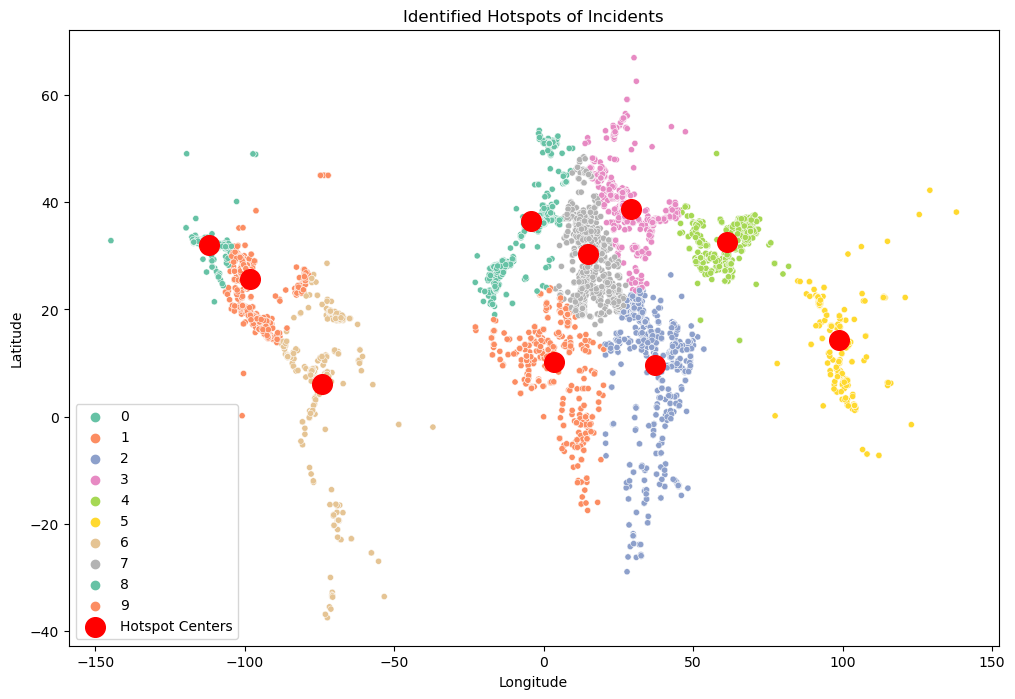

array([[  36.45034341,   -4.08226738],
       [  25.70493207,  -98.18063951],
       [   9.57098025,   37.38139631],
       [  38.68474863,   29.17553752],
       [  32.57847856,   61.18692206],
       [  14.22998638,   98.67894115],
       [   6.0588346 ,  -73.99205479],
       [  30.32441141,   14.73479488],
       [  32.0286725 , -112.07390167],
       [  10.27151288,    3.32414728]])

In [25]:

# Remove missing values to prepare for clustering
lat_lon_data = raw_data[['lat', 'lon']].dropna()

# Using KMeans clustering to identify hotspots
# We will start with 10 clusters 
kmeans = KMeans(n_clusters=10, random_state=0).fit(lat_lon_data)

# Get the cluster centers (hotspots)
hotspots = kmeans.cluster_centers_

# Add cluster labels to the original data for visualization
lat_lon_data['Cluster'] = kmeans.labels_

# Plot the data points and cluster centers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=lat_lon_data, x='lon', y='lat', hue='Cluster', palette='Set2', s=20)
plt.scatter(hotspots[:, 1], hotspots[:, 0], s=200, c='red', label='Hotspot Centers')
plt.title('Identified Hotspots of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

hotspots


In [26]:
# # Remove missing values to prepare for clustering based on migration routes
# route_lat_lon_data = raw_data[['lat', 'lon', 'migration_route']].dropna()

# # Initialize an empty dictionary to store the hotspots for each migration route
# hotspots_by_route = {}

# # Loop through each unique migration route
# for route in route_lat_lon_data['migration_route'].unique():
#     # Extract the data for the current route
#     route_data = route_lat_lon_data[route_lat_lon_data['migration_route'] == route][['lat', 'lon']]
    
#     # Determine the number of clusters based on the number of samples
#     n_clusters = min(3, len(route_data))  # Use 3 clusters or fewer if not enough samples
    
#     # Skip clustering if only one sample
#     if n_clusters < 2:
#         continue
    
#     # Perform KMeans clustering
#     kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(route_data)
    
#     # Store the cluster centers (hotspots) in the dictionary
#     hotspots_by_route[route] = kmeans.cluster_centers_
    
#     # Add cluster labels to the original data for visualization
#     route_data['Cluster'] = kmeans.labels_
    
#     # Plot the data points and cluster centers
#     plt.figure(figsize=(12, 8))
#     sns.scatterplot(data=route_data, x='lon', y='lat', hue='Cluster', palette='Set2', s=20)
#     plt.scatter(hotspots_by_route[route][:, 1], hotspots_by_route[route][:, 0], s=200, c='red', label='Hotspot Centers')
#     plt.title(f'Identified Hotspots for {route}')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.legend()
#     plt.show()

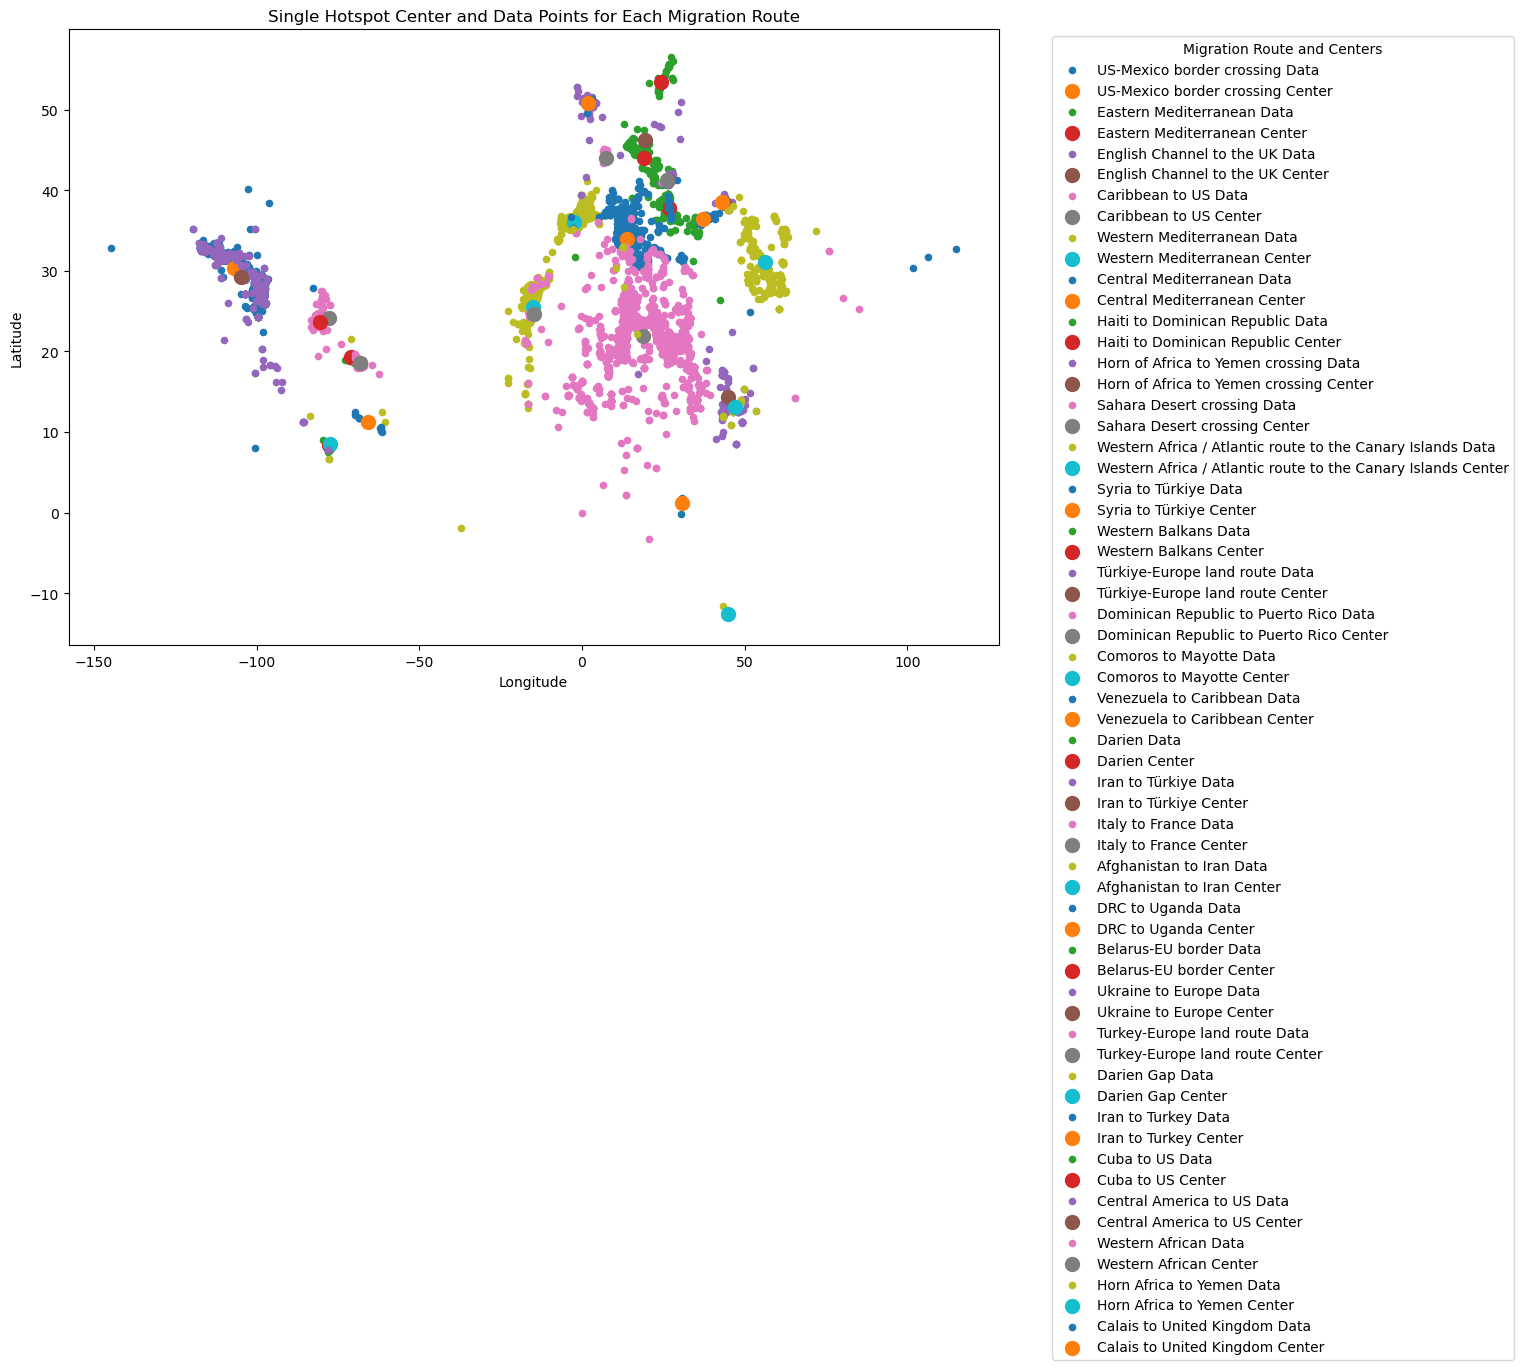

In [27]:
# Remove missing values to prepare for clustering based on migration routes
route_lat_lon_data = raw_data[['lat', 'lon', 'migration_route']].dropna()

# Initialize an empty dictionary to store the single hotspot for each migration route
hotspot_by_route = {}

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each unique migration route
for route in route_lat_lon_data['migration_route'].unique():
    # Extract the data for the current route
    route_data = route_lat_lon_data[route_lat_lon_data['migration_route'] == route][['lat', 'lon']]
    
    # Skip if only one sample
    if len(route_data) < 2:
        continue
    
    # Perform KMeans clustering with n_clusters set to 1
    kmeans = KMeans(n_clusters=1, random_state=0, n_init=10).fit(route_data)
    
    # Store the cluster center (single hotspot) in the dictionary
    hotspot_by_route[route] = kmeans.cluster_centers_[0]
    
    # Plot the individual data points
    plt.scatter(route_data['lon'], route_data['lat'], label=f'{route} Data', s=20)
    
    # Plot the single cluster center
    plt.scatter(hotspot_by_route[route][1], hotspot_by_route[route][0], label=f'{route} Center', s=100)

# Finalize the plot
plt.title('Single Hotspot Center and Data Points for Each Migration Route')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Migration Route and Centers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:

# Initialize a base map
m = folium.Map(location=[20, 0], zoom_start=3)

# Create a color map
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
color_map = {route: colors[i % len(colors)] for i, route in enumerate(route_lat_lon_data['migration_route'].unique())}

# Loop through each unique migration route
for route in route_lat_lon_data['migration_route'].unique():
    # Extract the data for the current route
    route_data = route_lat_lon_data[route_lat_lon_data['migration_route'] == route][['lat', 'lon']]
    
    # Skip if only one sample
    if len(route_data) < 2:
        continue
    
    # Perform KMeans clustering with n_clusters set to 1
    kmeans = KMeans(n_clusters=1, random_state=0, n_init=10).fit(route_data)
    
    # Store the cluster center (single hotspot) in the dictionary
    hotspot = kmeans.cluster_centers_[0]
    
    # Get the color for this route from the color map
    route_color = color_map[route]
    
    # Plot individual data points on the map
    for i, row in route_data.iterrows():
        folium.CircleMarker(location=[row['lat'], row['lon']], radius=3, color=route_color, fill=True, fill_color=route_color).add_to(m)
    
    # Plot the single cluster center on the map
    folium.Marker(location=[hotspot[0], hotspot[1]], popup=f'{route} Center', icon=folium.Icon(color=route_color)).add_to(m)

# Show the map
m
